In [159]:
import numpy as np
import pandas as pd
import random
import time
import csv
import wordcloud
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import Image

# Data collection and cleaning

I define a web scraping function that can scrape job postings and full job descriptions. The function requires input: position, location, vjk and number_scrape. Firstly, I search the position and location on indeed website. Then I will get the website link, there's vjk in the website link. I copy the vjk and input the position, location and vjk into the function. After searching for the job position and the location, I look at the total number of jobs and decide the value of number_scrape, which is the number of postings to scrape. Then I call the function with these inputs to get the job posting and full job descriptions. At last, I convert the data frame to a csv file to save the dats. In order to get enough data (at least 1000), I searched the position: data scientist in three locations: New York, Chicago and San Francisco. Then I drop the duplicate data in each dataset, combine three csv files into one csv file and, again, drop the duplicate data. Finally, I get 1194 job posts of data scientist in New York, Chicago and San Francisco.

## Path to webdriver (Chrome)

## Define position, location; Scrape job postings and full job descriptions

## Combine three csv files

# Exploratory data analysis and feature engineering

In [2]:
# Load the data we collected and cleaned
df_raw = pd.read_csv('webscraping_results_assignmnet3.csv')

In [3]:
df_raw

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)",4.3,PostedPosted 30+ days ago,"$68,880 - $113,400 a year","Experience with survey analytics, data managem...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Relocation Assistance Offered Within Country\n...
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",4.9,PostedPosted 30+ days ago,$55.29 - $69.12 an hour,""" Apply knowledge of statistics, machine learn...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,JOB TITLE: Data Scientist - NLP\nLOCATION: Rem...
2,Data Scientist,Ntropy Network,"Remote in New York, NY",NaN,PostedPosted 30+ days ago,"$130,000 a year",Our end product is an API that makes financial...,https://www.indeed.com/rc/clk?jk=fe6e382847752...,"Over the last few decades, technological innov..."
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",NaN,PostedPosted 30 days ago,$88.50 - $90.50 an hour,This role will build and deploy production eng...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,We are seeking an experienced Applied ML Engin...
4,Data Scientist,Paramount Networks International,"New York, NY 10036",3.9,PostedPosted 18 days ago,"$150,000 - $160,000 a year",Experience of working on a project end-to-end:...,https://www.indeed.com/rc/clk?jk=92a06e8f05ff1...,"Paramount Networks International, a unit of Pa..."
...,...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,4.9,PostedPosted 22 days ago,"$110,000 - $130,000 a year",The ideal candidate will be responsible for de...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Location: Remote\nType: Full-Time\nSalary: $11...
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,3.9,PostedPosted 30+ days ago,NaN,Embrace offers a competitive compensation mode...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Overview:\nCompany Description\nEmbrace Pet In...
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,3.9,PostedPosted 30+ days ago,NaN,Develops and summarizes defined analyses using...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Bravo-Sr Data Analyst - Remote\n- (2200513)\n\...
1192,Cloud Data Engineer,Kaztronix,United States,3.1,PostedPosted 30 days ago,NaN,"Advanced knowledge of statistical, data mining...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Cloud Data Engineer will report to the Sen...


## Clean Data

To clean the data, we need lower casing firstly and then remove URL,emojis, punctuations and lastly stop words.
For the removing of punctuations, I didn't use the method of regular expression which is easier and convenience. The reason is that use of regular expression will remove the '#' and '+'. However, the hard skills c++ and c# will be affected and only kept c if we use regular expression. This will affect our result and analysis. So I remove all the punctuations except '#' and '+'. For removing stop words, I use nltk package.

In [4]:
df = df_raw.copy()

In [5]:
# Lower casing
df['Descriptions'] = df['Descriptions'].apply(lambda x: x.lower())

In [6]:
# remove URL
import re
df['Descriptions'] = df['Descriptions'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [7]:
# Remove all emojis
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode('ascii') #it encodes a unicode string to ascii and ignores errors
    return text
df['Descriptions'] = df['Descriptions'].apply(remove_emoji)

In [8]:
# remove punctuations
df['Descriptions'] = df['Descriptions'].str.replace('<[^<]+?>', '',regex=True)

punctuation_list = [',','.','&','-',':',';','\/','\(','\)','\'','\’','\\','!','@','$','%','^','*','_','=','?','|',
                    '\[','\]','\{','\}','—','<','>','–','\"','\“','\”','~','®','•','‘','·','™','…','°','©',';','¨','','€']

for i in punctuation_list:
    df['Descriptions'] = df['Descriptions'].str.replace(i, '',regex=True)

In [9]:
# Remove stop words by using nltk package
import nltk
from nltk.corpus import stopwords  
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Descriptions'] = df['Descriptions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /Users/max/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Organize data and Engineer features for clusting analysis

In [10]:
# Count the unique words in df
unique_word_count = pd.Series(''.join(df['Descriptions']).split()).value_counts()
unique_word_count

data                    11896
experience               6743
work                     4017
business                 3594
team                     3385
                        ...  
loud                        1
signaling                   1
218600                      1
uxui                        1
electricalindustrial        1
Length: 20407, dtype: int64

To extract the features, after I finished studying the frequency of each word appears in the full description, I make two lists for hard skills and soft skills. Each list contains the hard or soft skills that occur frequently or are necessary.

In [11]:
hard_skills = ['excel','python','pandas','r','java','javascript', 'c','c++','c#','matlab','scikit','sas','sql', 'spss',
               'tableau','power bi', 'power','bi', 'hadoop', 'spark','data mining','mining', 'machine learning', 
               'ml','machine', 'ai','artificial intelligence','artificial'
               'cloud','quantitative','statistical','statistics','cloudbased',
               'mathematics','visualization','powerpoint','scala','snowflake']

soft_skills = ['communication','communities','presentation', 'problem solving','solving', 'project management',
               'project', 'consulting','leadership','collaborate','decisions','decision making','decision',
               'teamwork','team work','team','responsibility','professional','proficiency','partner',
               'analytics', 'analysis', 'analytical','collaboration','critical','efficient']
skills = hard_skills + soft_skills

I combine the hard_skills and soft_skills to column skills to help organize data into logically formatted data structure for clustering analysis.

In [12]:
df['hard skills'] = df['Descriptions'].apply(lambda x: ' '.join(i for i in x.split() if i in hard_skills))
df['soft skills'] = df['Descriptions'].apply(lambda x: ' '.join(i for i in x.split() if i in soft_skills))
df['skills'] = df['Descriptions'].apply(lambda x: ' '.join(i for i in x.split() if i in skills))

In [13]:
df_new = df.copy()
df_new.drop(['Rating'], axis=1, inplace=True)
df_new.drop(['Date'], axis=1, inplace=True)
df_new.drop(['Links'], axis=1, inplace=True)
df_new.drop(['Description'], axis=1, inplace=True)

In [14]:
df_new

,Title,Company,Location,Salary,Descriptions,hard skills,soft skills,skills
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)","$68,880 - $113,400 a year",relocation assistance offered within country #...,mining statistical ml mining ml statistical vi...,analytical team project analytics analysis ana...,analytical team project mining analytics stati...
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",$55.29 - $69.12 an hour,job title data scientist nlp location remote d...,statistics machine mathematics bi visualizatio...,analytical analysis analysis,statistics machine mathematics analytical bi v...
2,Data Scientist,Ntropy Network,"Remote in New York, NY","$130,000 a year",last decades technological innovation relied d...,mathematics python pandas sql statistics pytho...,team team project project project,mathematics team team python pandas sql statis...
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",$88.50 - $90.50 an hour,seeking experienced applied ml engineer join t...,ml ml machine machine ml power python spark pa...,team analysis analysis critical analysis analy...,ml team analysis analysis ml critical machine ...
4,Data Scientist,Paramount Networks International,"New York, NY 10036","$150,000 - $160,000 a year",paramount networks international unit paramoun...,ai ml machine mathematics statistics python st...,analytics decision critical decisions analytic...,analytics decision critical decisions analytic...
...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,"$110,000 - $130,000 a year",location remote type fulltime salary 110000 13...,machine machine statistics mathematics quantit...,critical team analytics partner collaborate an...,critical team analytics machine partner collab...
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,NaN,overview company description embrace pet insur...,machine quantitative sql python pandas scikit ...,team team team team collaboration team analyti...,team team team machine team collaboration quan...
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,NaN,bravosr data analyst remote 2200513 minimal su...,quantitative visualization visualization table...,analytics presentation analysis analytics anal...,analytics quantitative presentation analysis v...
1192,Cloud Data Engineer,Kaztronix,United States,NaN,cloud data engineer report senior manager asse...,cloudbased statistical machine sql sql quantit...,analytics analytics analysis analytics analyti...,cloudbased analytics analytics analysis analyt...


In each list, there are some words have similar or same meaning. For example, 'analysis', 'analytical' and 'analytics' express the similar meaning. We need to make them as one word and appear one time. Otherwise it will affect the clustering and visualization. The more times the same word appears, the greater its influence on the clustering and visualization. The reason why we only need each word with same meaning appears one time in each job description is that: if a word appears many times in a job description and no appear in many other job descriptions, the clustering will be affected by thinking that words appears in many job descriptions rather than appearing in only one job description.

Firstly, I set the similar words all into the corresponding one words. For example, I set 'analysis', 'analytical' and 'analytics' all into 'analytics'. Set 'machine learning' and 'ml' all into 'ml' and so on. And also set the word with two words and a space into one word without space, e.g. 'power bi' to 'powerbi'. Secondly, for each word in each job description, I remove the duplicated word and only keep one left.

The full sets are below:

In [15]:
def merge_similar_words_softskills(data):
    for i in range(len(data)):
        list_1 = data[i].split()
        for j in range(len(list_1)):
            if list_1[j] == 'analysis':
                list_1[j] = 'analytics'
            elif  list_1[j] == 'analytical':
                list_1[j] = 'analytics'
        
            if list_1[j] == 'proficiency':
                list_1[j] = 'professional'
            
            if list_1[j] == 'communities':
                list_1[j] = 'communication'
        
            if list_1[j] == 'collaborate':
                list_1[j] = 'teamwork'
            elif list_1[j] == 'team':
                list_1[j] = 'teamwork'
            elif list_1[j] == 'work':
                list_1[j] = 'teamwork'
            elif list_1[j] == 'partner':
                list_1[j] = 'teamwork'
            elif list_1[j] == 'collaboration':
                list_1[j] = 'teamwork'
            
        
            if list_1[j] == 'decision':
                list_1[j] = 'decisionmaking'
            elif list_1[j] == 'making':
                list_1[j] = 'decisionmaking'
            elif list_1[j] == 'decisions':
                list_1[j] = 'decisionmaking'
                
            
            if list_1[j] == 'project':
                list_1[j] = 'projectmanagement'
            elif list_1[j] == 'management':
                list_1[j] = 'projectmanagement'
            
            if list_1[j] == 'problem':
                list_1[j] = 'problemsolving'
            elif list_1[j] == 'solving':
                list_1[j] = 'problemsolving'
            
        data[i] = ' '.join(list_1)

In [16]:
def merge_similar_words_hardskills(data):
    for i in range(len(data)):
        list_2 = data[i].split()
        for j in range(len(list_2)):
            if list_2[j] == 'machine':
                list_2[j] = 'ml'
            elif list_2[j] == 'learning':
                list_2[j] = 'ml'

            
            if list_2[j] == 'artificial':
                list_2[j] = 'ai'
            elif list_2[j] == 'intelligence':
                list_2[j] = 'ai'
        
        
            if list_2[j] == 'statistical':
                list_2[j] = 'statistics'
        
        
            if list_2[j] == 'data':
                list_2[j] = 'datamining'
            elif list_2[j] == 'mining':
                list_2[j] = 'datamining'
        
            if list_2[j] == 'power':
                list_2[j] = 'powerbi'
            elif list_2[j] == 'bi':
                list_2[j] = 'powerbi'
        
            if list_2[j] == 'cloud':
                list_2[j] = 'cloudbased'
        
        data[i] = ' '.join(list_2)

In [17]:
merge_similar_words_softskills(df_new['soft skills'])
merge_similar_words_hardskills(df_new['hard skills'])
df_new['skills'] = df_new['soft skills'] +' ' + df_new['hard skills']

In [18]:
df_new

,Title,Company,Location,Salary,Descriptions,hard skills,soft skills,skills
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)","$68,880 - $113,400 a year",relocation assistance offered within country #...,datamining statistics ml datamining ml statist...,analytics teamwork projectmanagement analytics...,analytics teamwork projectmanagement analytics...
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",$55.29 - $69.12 an hour,job title data scientist nlp location remote d...,statistics ml mathematics powerbi visualizatio...,analytics analytics analytics,analytics analytics analytics statistics ml ma...
2,Data Scientist,Ntropy Network,"Remote in New York, NY","$130,000 a year",last decades technological innovation relied d...,mathematics python pandas sql statistics pytho...,teamwork teamwork projectmanagement projectman...,teamwork teamwork projectmanagement projectman...
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",$88.50 - $90.50 an hour,seeking experienced applied ml engineer join t...,ml ml ml ml ml powerbi python spark pandas qua...,teamwork analytics analytics critical analytic...,teamwork analytics analytics critical analytic...
4,Data Scientist,Paramount Networks International,"New York, NY 10036","$150,000 - $160,000 a year",paramount networks international unit paramoun...,ai ml ml mathematics statistics python statist...,analytics decisionmaking critical decisionmaki...,analytics decisionmaking critical decisionmaki...
...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,"$110,000 - $130,000 a year",location remote type fulltime salary 110000 13...,ml ml statistics mathematics quantitative stat...,critical teamwork analytics teamwork teamwork ...,critical teamwork analytics teamwork teamwork ...
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,NaN,overview company description embrace pet insur...,ml quantitative sql python pandas scikit stati...,teamwork teamwork teamwork teamwork teamwork t...,teamwork teamwork teamwork teamwork teamwork t...
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,NaN,bravosr data analyst remote 2200513 minimal su...,quantitative visualization visualization table...,analytics presentation analytics analytics ana...,analytics presentation analytics analytics ana...
1192,Cloud Data Engineer,Kaztronix,United States,NaN,cloud data engineer report senior manager asse...,cloudbased statistics ml sql sql quantitative ...,analytics analytics analytics analytics analyt...,analytics analytics analytics analytics analyt...


In [19]:
# remove the duplicate element
for i in range(len(df_new['hard skills'])):
    list_1 = df_new['hard skills'][i].split()
    unique_1 = set(list_1)
    df_new['hard skills'][i] = ' '.join(unique_1)

for i in range(len(df_new['soft skills'])):
    list_2 = df_new['soft skills'][i].split()
    unique_2 = set(list_2)
    df_new['soft skills'][i] = ' '.join(unique_2)

for i in range(len(df_new['skills'])):
    list_3 = df_new['skills'][i].split()
    unique_3 = set(list_3)
    df_new['skills'][i] = ' '.join(unique_3)

In [20]:
df_new

,Title,Company,Location,Salary,Descriptions,hard skills,soft skills,skills
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)","$68,880 - $113,400 a year",relocation assistance offered within country #...,visualization powerbi datamining r ml python s...,projectmanagement analytics teamwork,visualization powerbi analytics datamining pro...
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",$55.29 - $69.12 an hour,job title data scientist nlp location remote d...,powerbi visualization ml sql mathematics stati...,analytics,powerbi visualization analytics ml sql mathema...
2,Data Scientist,Ntropy Network,"Remote in New York, NY","$130,000 a year",last decades technological innovation relied d...,ml python pandas sql mathematics statistics,projectmanagement teamwork,projectmanagement teamwork ml python statistic...
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",$88.50 - $90.50 an hour,seeking experienced applied ml engineer join t...,powerbi spark ml python quantitative pandas,communication critical analytics teamwork,powerbi analytics communication critical teamw...
4,Data Scientist,Paramount Networks International,"New York, NY 10036","$150,000 - $160,000 a year",paramount networks international unit paramoun...,scikit r quantitative ml python spark sql math...,professional analytics critical communication ...,professional scikit analytics critical communi...
...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,"$110,000 - $130,000 a year",location remote type fulltime salary 110000 13...,quantitative ml python mathematics statistics,teamwork analytics critical,analytics critical teamwork quantitative ml py...
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,NaN,overview company description embrace pet insur...,mathematics quantitative ml python statistics ...,professional analytics critical communication ...,professional analytics mathematics critical co...
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,NaN,bravosr data analyst remote 2200513 minimal su...,visualization r snowflake quantitative python ...,professional analytics communication presentat...,professional visualization analytics communica...
1192,Cloud Data Engineer,Kaztronix,United States,NaN,cloud data engineer report senior manager asse...,java powerbi datamining sas r cloudbased hadoo...,professional analytics consulting communicatio...,hadoop ml python sql mathematics statistics pr...


Use TF (count vectorization) for clustering analysis

In [21]:
#Bag-of-words using count vectorization (TF)
from sklearn.feature_extraction.text import CountVectorizer
#token_pattern=r'\b[a-zA-Z]{3,}\b' exclude anything that has numbers in it.
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b',stop_words='english')
X = vectorizer.fit_transform(df_new['skills'])
#in matrix form 
tf=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [22]:
tf

,analytics,cloudbased,communication,consulting,critical,datamining,decisionmaking,efficient,excel,hadoop,...,scala,scikit,snowflake,spark,spss,sql,statistics,tableau,teamwork,visualization
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1190,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1191,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1192,1,1,1,1,0,1,1,0,0,1,...,0,0,0,1,0,1,1,1,1,0


In [23]:
# Now we can have the dataframe for clustering analysis
df_new = pd.concat([df_new,tf], axis=1)
df_new.drop(['Descriptions'], axis=1, inplace=True)
df_new.drop(['hard skills'], axis=1, inplace=True)
df_new.drop(['soft skills'], axis=1, inplace=True)
df_new.drop(['skills'], axis=1, inplace=True)

In [24]:
df_new

,Title,Company,Location,Salary,analytics,cloudbased,communication,consulting,critical,datamining,...,scala,scikit,snowflake,spark,spss,sql,statistics,tableau,teamwork,visualization
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)","$68,880 - $113,400 a year",1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",$55.29 - $69.12 an hour,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,Data Scientist,Ntropy Network,"Remote in New York, NY","$130,000 a year",0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",$88.50 - $90.50 an hour,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,Data Scientist,Paramount Networks International,"New York, NY 10036","$150,000 - $160,000 a year",1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,"$110,000 - $130,000 a year",1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,NaN,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,NaN,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1192,Cloud Data Engineer,Kaztronix,United States,NaN,1,1,1,1,0,1,...,0,0,0,1,0,1,1,1,1,0


## Visualization

In [25]:
merge_similar_words_softskills(df['soft skills'])
merge_similar_words_hardskills(df['hard skills'])
df['skills'] = df['soft skills'] +' ' + df['hard skills']

<ipython-input-15-4343661b4567>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = ' '.join(list_1)
<ipython-input-16-73ea57fdce98>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = ' '.join(list_2)


In [26]:
# remove the duplicate element
for i in range(len(df['hard skills'])):
    list_1 = df['hard skills'][i].split()
    unique_1 = set(list_1)
    df['hard skills'][i] = ' '.join(unique_1)

for i in range(len(df['soft skills'])):
    list_2 = df['soft skills'][i].split()
    unique_2 = set(list_2)
    df['soft skills'][i] = ' '.join(unique_2)

for i in range(len(df['skills'])):
    list_3 = df['skills'][i].split()
    unique_3 = set(list_3)
    df['skills'][i] = ' '.join(unique_3)

<ipython-input-26-d2677634fced>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hard skills'][i] = ' '.join(unique_1)
<ipython-input-26-d2677634fced>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['soft skills'][i] = ' '.join(unique_2)
<ipython-input-26-d2677634fced>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skills'][i] = ' '.join(unique_3)


In [27]:
df

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,hard skills,soft skills,skills
0,Sustainability Data Analyst,Colgate-Palmolive,"New York, NY 10022 (Midtown area)",4.3,PostedPosted 30+ days ago,"$68,880 - $113,400 a year","Experience with survey analytics, data managem...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,relocation assistance offered within country #...,visualization powerbi datamining r ml python s...,projectmanagement analytics teamwork,visualization powerbi analytics datamining pro...
1,Data Scientist - NLP,"Ursus, Inc.","Remote in New York, NY 10001",4.9,PostedPosted 30+ days ago,$55.29 - $69.12 an hour,""" Apply knowledge of statistics, machine learn...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,job title data scientist nlp location remote d...,powerbi visualization ml sql mathematics stati...,analytics,powerbi visualization analytics ml sql mathema...
2,Data Scientist,Ntropy Network,"Remote in New York, NY",NaN,PostedPosted 30+ days ago,"$130,000 a year",Our end product is an API that makes financial...,https://www.indeed.com/rc/clk?jk=fe6e382847752...,last decades technological innovation relied d...,ml python pandas sql mathematics statistics,projectmanagement teamwork,projectmanagement teamwork ml python statistic...
3,Applied Senior Machine Learning Engineer,the agency worx,"New York, NY",NaN,PostedPosted 30 days ago,$88.50 - $90.50 an hour,This role will build and deploy production eng...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,seeking experienced applied ml engineer join t...,powerbi spark ml python quantitative pandas,communication critical analytics teamwork,powerbi analytics communication critical teamw...
4,Data Scientist,Paramount Networks International,"New York, NY 10036",3.9,PostedPosted 18 days ago,"$150,000 - $160,000 a year",Experience of working on a project end-to-end:...,https://www.indeed.com/rc/clk?jk=92a06e8f05ff1...,paramount networks international unit paramoun...,scikit r quantitative ml python spark sql math...,professional analytics critical communication ...,professional scikit analytics critical communi...
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Remote Data Scientist ( Python / Data Analytics ),VALINTRY Technology,Remote in United States,4.9,PostedPosted 22 days ago,"$110,000 - $130,000 a year",The ideal candidate will be responsible for de...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,location remote type fulltime salary 110000 13...,quantitative ml python mathematics statistics,teamwork analytics critical,analytics critical teamwork quantitative ml py...
1190,Sr. Data Scientist,Embrace Pet Insurance,United States,3.9,PostedPosted 30+ days ago,NaN,Embrace offers a competitive compensation mode...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,overview company description embrace pet insur...,mathematics quantitative ml python statistics ...,professional analytics critical communication ...,professional analytics mathematics critical co...
1191,Bravo-Sr Data Analyst - Remote,Medical Mutual of Ohio,Remote in United States,3.9,PostedPosted 30+ days ago,NaN,Develops and summarizes defined analyses using...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,bravosr data analyst remote 2200513 minimal su...,visualization r snowflake quantitative python ...,professional analytics communication presentat...,professional visualization analytics communica...
1192,Cloud Data Engineer,Kaztronix,United States,3.1,PostedPosted 30 days ago,NaN,"Advanced knowledge of statistical, data mining...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,cloud data engineer report senior manager asse...,java powerbi datamining sas r cloudbased hadoo...,professional analytics consulting communicatio...,hadoop ml python sql mathematics statistics pr...


### Wordcloud of hard/technical skills

Find how many times the each hard skills apprears in the full job description and use wordcloud. The more times the skill(word) appears, the larger the word indicates in the wordcloud.

In [28]:
hard_skills_set = df['hard skills'][0]
for i in range(1,1194):
    hard_skills_set = hard_skills_set + ' ' + df['hard skills'][i]

Text(0.5, 1.0, 'Wordcloud of hard skills/technical')

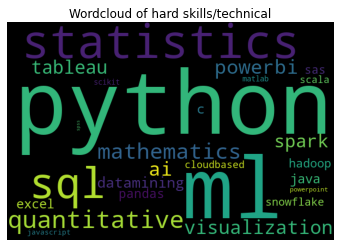

In [29]:
w=wordcloud.WordCloud(width = 600, height = 400,collocations=False, random_state =217)
txt_hardskills=hard_skills_set
hard_skills_wordcloud = w.generate(txt_hardskills)
plt.imshow(hard_skills_wordcloud)
plt.axis("off")
plt.title('Wordcloud of hard skills/technical')

### Wordcloud of soft/business skills

Find how many times the each soft skills appears in the full job description and use wordcloud. The more times the skill(word) appears, the larger the word indicates in the wordcloud.

In [30]:
soft_skills_set = df['soft skills'][0]
for i in range(1,1194):
    soft_skills_set = soft_skills_set + ' ' + df['soft skills'][i]

Text(0.5, 1.0, 'Wordcloud of soft skills/business')

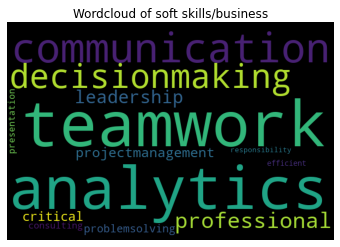

In [31]:
w=wordcloud.WordCloud(width = 600, height = 400,collocations=False, random_state =217)
txt_softskills=soft_skills_set
soft_skills_wordcloud = w.generate(txt_softskills)
plt.imshow(soft_skills_wordcloud)
plt.axis("off")
plt.title('Wordcloud of soft skills/business')

### Wordcloud of all skills

Text(0.5, 1.0, 'Wordcloud of all skills')

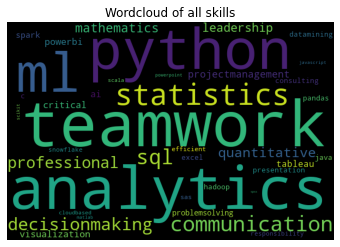

In [32]:
all_skills_set  = hard_skills_set + ' ' + soft_skills_set

w=wordcloud.WordCloud(width = 600, height = 400,collocations=False, random_state =217)
txt_allskills=all_skills_set
all_skills_wordcloud = w.generate(txt_allskills)
plt.imshow(all_skills_wordcloud)
plt.axis("off")
plt.title('Wordcloud of all skills')

### Hard skills/technical VS. Job titles

Plot each hard skill is required by how many jobs (in percentage)

In [33]:
hard_skills_new = ['excel','python','pandas','r','java','javascript', 'c','c++','c#','matlab','scikit','sas',
                   'sql', 'spss', 'tableau', 'powerbi', 'hadoop', 'spark','datamining',  'ml', 'ai',
                   'quantitative','statistics','cloudbased','mathematics','visualization','powerpoint',
                   'scala','snowflake']

In [34]:
hardskills_job = np.zeros(len(hard_skills_new))

for i in range(len(hard_skills_new)):
    for j in range(len(df)):
        if hard_skills_new[i] in df['hard skills'][j]:
            hardskills_job[i] =  hardskills_job[i] + 1

Text(0.5, 1.0, 'Each hard skill is required by how many jobs (in percentage)')

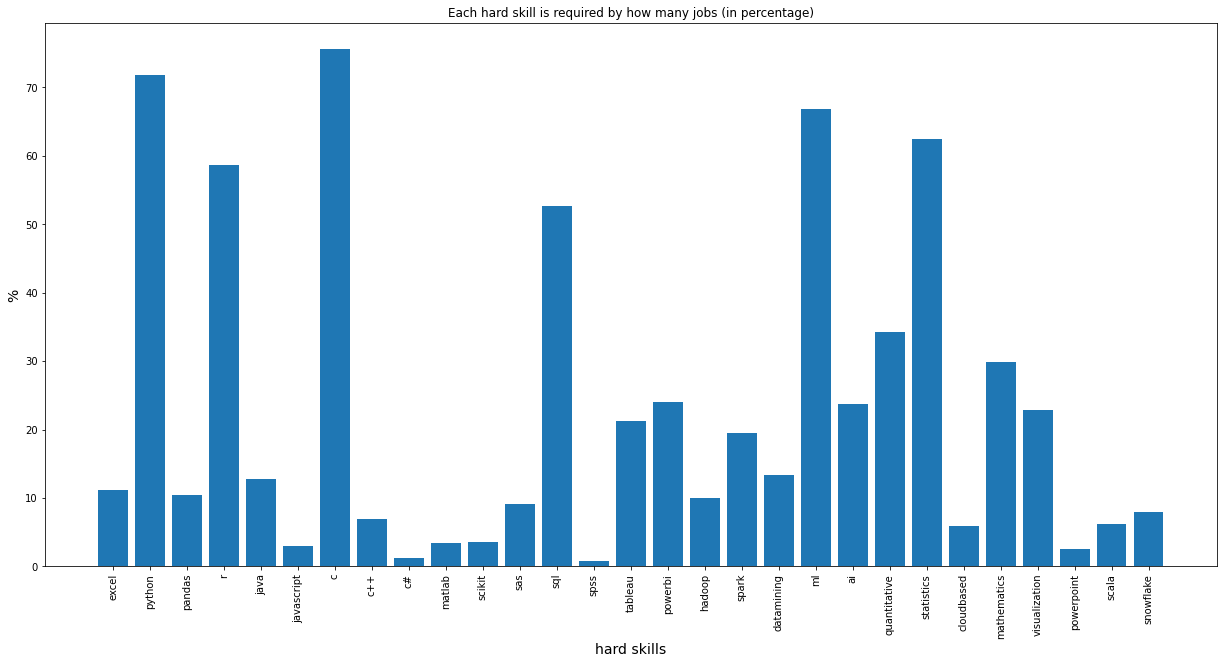

In [35]:
hardskills_job_percentage = hardskills_job / df.shape[0] * 100

plt.figure(figsize = (21,10))
plt.bar(range(len(hardskills_job_percentage)),hardskills_job_percentage)
plt.xlabel('hard skills', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.xticks(range(len(hardskills_job_percentage)), hard_skills_new, rotation=90)
plt.title('Each hard skill is required by how many jobs (in percentage)')

### Soft skills/technical VS. Job titles

Plot each soft skill is required by how many jobs (in percentage)

In [36]:
soft_skills_new = ['communication','presentation', 'problemsolving', 'projectmanagement', 'consulting',
                   'leadership','decisionmaking','teamwork','responsibility','professional','analytics',
                   'critical','efficient']

In [37]:
softskills_job = np.zeros(len(soft_skills_new))

for i in range(len(soft_skills_new)):
    for j in range(len(df)):
        if soft_skills_new[i] in df['soft skills'][j]:
            softskills_job[i] =  softskills_job[i] + 1

Text(0.5, 1.0, 'Each soft skill is required by how many jobs (in percentage)')

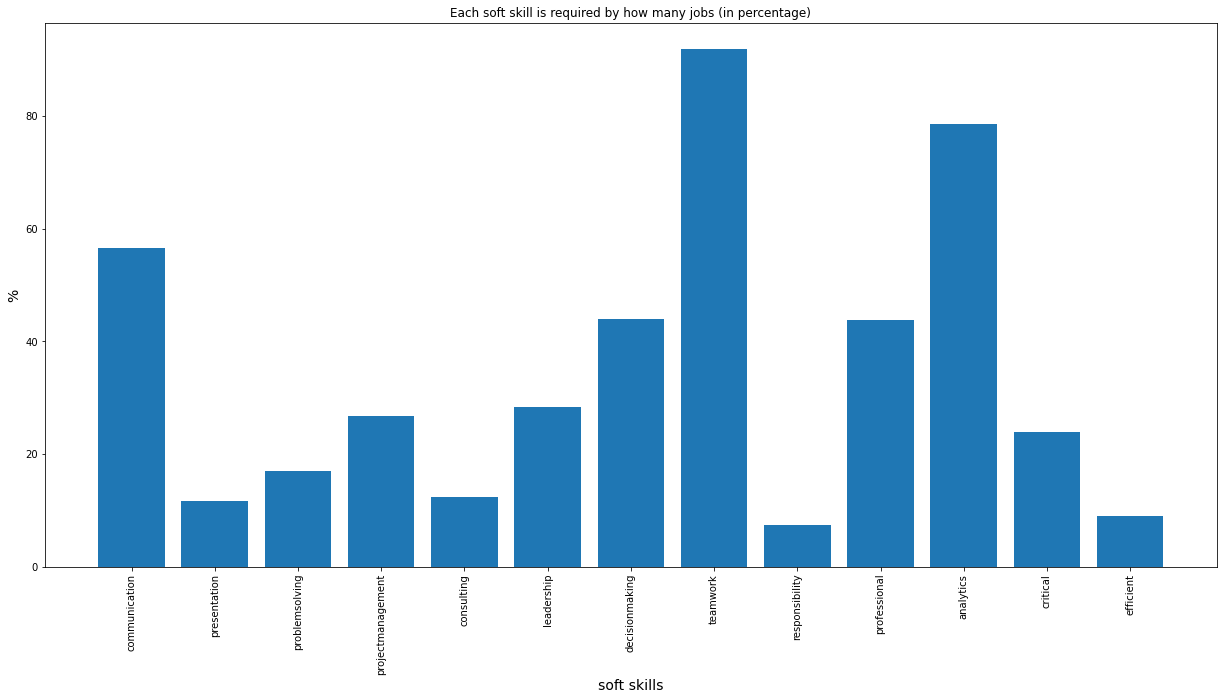

In [38]:
softskills_job_percentage = softskills_job / df.shape[0] * 100

plt.figure(figsize = (21,10))
plt.bar(range(len(softskills_job_percentage)),softskills_job_percentage)
plt.xlabel('soft skills', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.xticks(range(len(softskills_job_percentage)), soft_skills_new, rotation=90)
plt.title('Each soft skill is required by how many jobs (in percentage)')

# Hierarchical clustering implementation

## Implement hierarchical clustering algorithm

In [39]:
tf

,analytics,cloudbased,communication,consulting,critical,datamining,decisionmaking,efficient,excel,hadoop,...,scala,scikit,snowflake,spark,spss,sql,statistics,tableau,teamwork,visualization
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1190,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1191,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1192,1,1,1,1,0,1,1,0,0,1,...,0,0,0,1,0,1,1,1,1,0


For the method for agglomerative hierarchical approach, I tried five method: single linkage, complete linkage, average linkage, centroid method and ward's method. The best result and dendrogram comes with using ward's method. So I use ward's method. 

Ward’s method does not directly define a measure of distance between two points or clusters. It is an ANOVA based approach. One-way univariate ANOVAs are done for each variable with groups defined by the clusters at that stage of the process. At each stage, two clusters merge that provide the smallest increase in the combined error sum of squares.

ref: https://online.stat.psu.edu/stat505/lesson/14/14.4

In [40]:
# Normalize
tf_normalize = normalize(tf,axis=1)
tf_normalize_pd = pd.DataFrame(tf_normalize)
# Creat Proximity Mateix
D = np.zeros([tf_normalize.shape[1],tf_normalize.shape[1]])

for i in range(tf_normalize.shape[1]):
    for j in range(tf_normalize.shape[1]):
        D[i,j] = euclidean(tf_normalize_pd.iloc[:,i], tf_normalize_pd.iloc[:,j])
        
# Hierarchical Clustering
Y = sch.linkage(D, method='ward')

<ipython-input-40-daa43084b6f8>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='ward')


In [42]:
# Get clustering results and append to dataframe
labels = sch.fcluster(Y, 0.8*D.max(), 'distance')

tf_hierarchical = tf.copy()
tf_hierarchical.loc[len(tf_hierarchical)]=labels-1
tf_hierarchical = tf_hierarchical.rename(index={1194:"cluster"})

In [43]:
tf_hierarchical

,analytics,cloudbased,communication,consulting,critical,datamining,decisionmaking,efficient,excel,hadoop,...,scala,scikit,snowflake,spark,spss,sql,statistics,tableau,teamwork,visualization
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1191,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
1192,1,1,1,1,0,1,1,0,0,1,...,0,0,0,1,0,1,1,1,1,0
1193,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Plot dendrogram and Decide number of clusters

[]

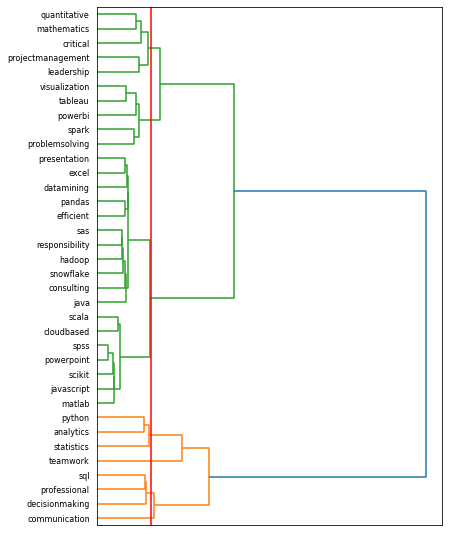

In [41]:
# Visualize Dendrograms
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get dendrograms
Z1 = sch.dendrogram(Y, orientation='right')
labels = tf.columns[Z1['leaves']]
ax1.set_xticks([])
ax1.set_yticklabels(labels)
ax1.axvline(x=13,c='r')
plt.plot()

I decide the number of cluster is 8. As we can see from the dendrogram above with the red line. The horizontal lines intersect with the vertical red line and it produces a total of eight points of intersection which are and make the eight clusters. The reason I decided to have 8 clusters has to do with the fact that we're going to design 8 to 12 courses. The specific reasons are below:

Looking at the intersection points from the top to down, the first point / the first cluster  has two small clusters: the first one includes 'quantitative' and 'mathematics', the second one includes 'critical','project management' and 'leadership'. These two small clusters can let us decide to design two courses which includes these skills respectively. Similarly, as we see the intersection points below, they all have small clusters respectively, so that we can design courses based on these small clusters and then have 8 - 12 courses. Only we have the appropriate number of clusters so that we can have enough small clusters to combine and design courses and have a sufficient and appropriate number (8-12) of courses. Also, we can't have too much clusters. If we decide to have too much clusters, this will make some small clusters be independent cluster and can't combine them together to design a course which contains both clusters' skills. It will also result in too many courses if each cluster is a course. It is meaningless to have too many independent courses, because it does not enable students to learn and use skills comprehensively.

# K-means clustering implementation:

## Implement k-means clustering algorithm

In order to visualize clustering result by using a labeled scatterplot from k-means clustering algorithm later, we need to reduct the data dimensionality. And then use the dimensionality reduced data to implement elbow method to find and determine the best number of clusters. Although we use the dimensionality reduced data, it will not affect the result.

In [114]:
# PCA Dimensionality Reduction
pca = PCA(random_state=42)
abs_reduced= pca.fit_transform(np.array(tf).T)
abs_reduced.shape

(36, 36)

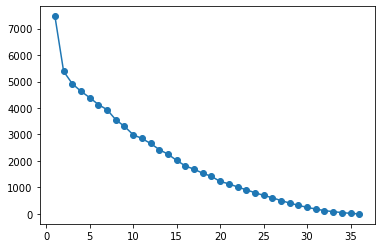

In [133]:
data_knn = abs_reduced
inertiase = []

# Elbow method to decide value of best n_clusters (best number of clusters)
for i in range(1,37):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_knn)
    inertiase.append(kmeans.inertia_)
plt.plot(range(1,37), inertiase, marker='o')
plt.show()

As we can see from the plot above, the explained variation goes down slowly after the tenth clusters and then we can see it is the elbow of the curve. And we can determine the best number of clusters is 10.

In [156]:
# Implement k-means clustering algorithm
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(data_knn)
label_kmeans = kmeans.fit_predict(data_knn) + 1

## Visualize clustering results

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


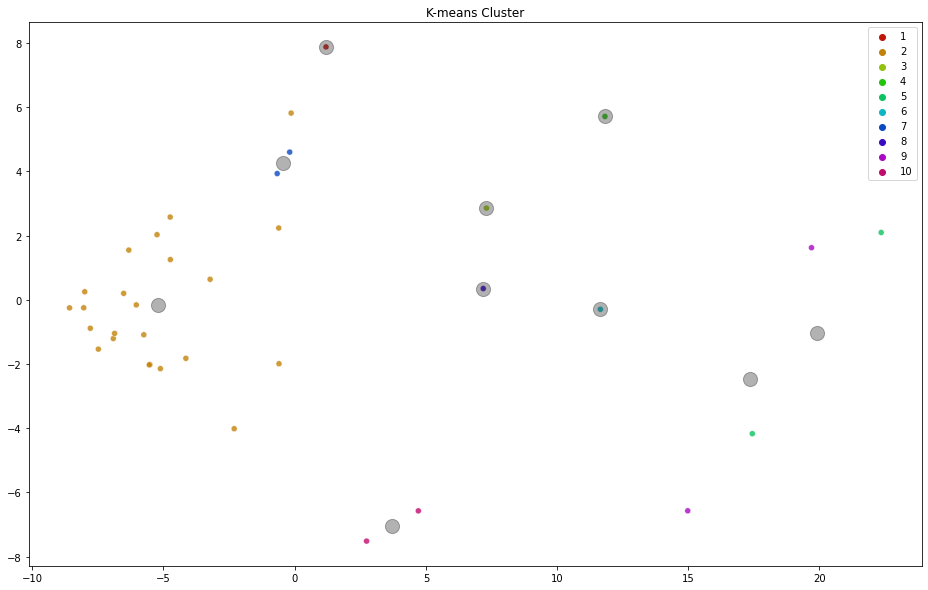

In [157]:
plt.figure(figsize=(16,10))
# Plot clusters
sns.scatterplot(abs_reduced[:,0], abs_reduced[:,1], hue=label_kmeans, legend='full',palette=sns.hls_palette(10, l=.4, s=.9), alpha=0.8)


for i in range(36):
    plt.text(abs_reduced[:,0][line]+0.01, abs_reduced[:,1][line], index[line], horizontalalignment='left',
            size='small',color='black')




# Plot centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.3);
plt.title('K-means Cluster')
plt.show()

In [158]:
tf_T = tf.T
tf_T['cluster'] = label_kmeans
tf_T.cluster.sort_values()

leadership            1
powerpoint            2
scikit                2
scala                 2
sas                   2
responsibility        2
spss                  2
projectmanagement     2
problemsolving        2
presentation          2
powerbi               2
pandas                2
snowflake             2
matlab                2
javascript            2
java                  2
hadoop                2
excel                 2
efficient             2
datamining            2
critical              2
consulting            2
cloudbased            2
spark                 2
professional          3
communication         4
teamwork              5
python                5
sql                   6
tableau               7
visualization         7
decisionmaking        8
statistics            9
analytics             9
mathematics          10
quantitative         10
Name: cluster, dtype: int32

As the scatter for K-means and label list shown above, there are 10 clusters with digit labels and each has a black centroid labeled in the center. The detail result are:
1. Group 1: leadership;
2. Group 2: powerpoint, scikit, scala, pandas, sas, spss, powerbi, snowflake, matlab, javascript, java, hadoop, excel, datamining, cloudbased, spark, responsibility, project management, problem solving, presentation, efficient, critical, consulting;
3. Group 3: professional;
4. Group 4: communication;
5. Group 5: python,teamwork;
6. Group 6: sql;
7. Group 7: tableau, visualization;
8. Group 8: decisionmaking;
9. Group 9: statistics, analytics;
10. Group 10: mathematics,quantitative.

We can find that Group 2 has many skills which include both many hard skills and soft skills. And many groups are assigned only one or two skills. Group 1,3,5,6,8 each only includes one skill. Group 4, 7, 9, 10 each includes two skills.

# Interpretation of results, discussion and final course curriculum:

## Section 3 (hierarchical clustering) Course Curriculum 

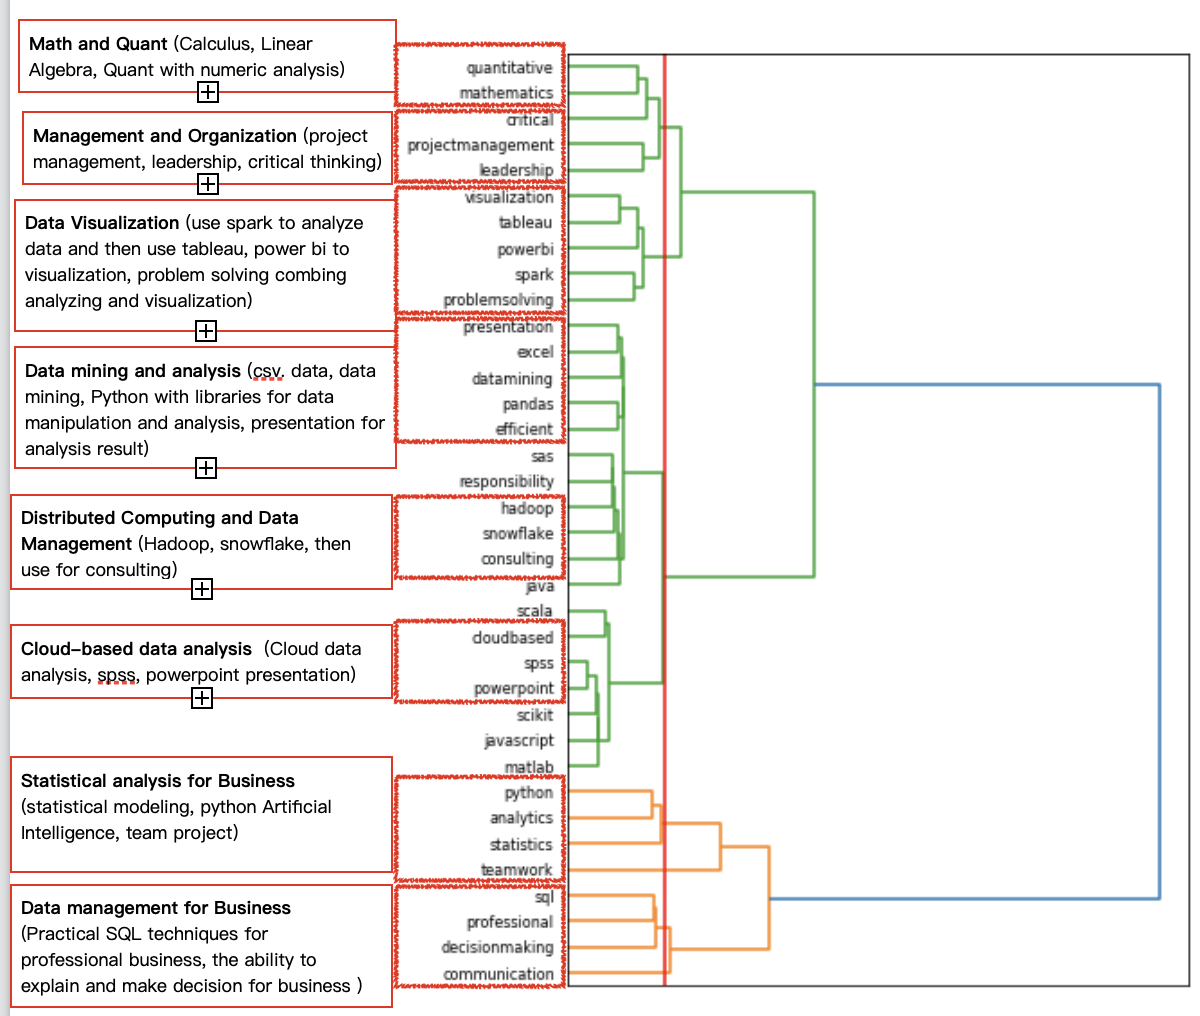

In [174]:
from IPython.display import Image
Image(filename = '/Users/max/Documents/MIE 1624/Assignment 3/Work on/Hierarchical Clustering Course Curriculum.png', width=500, height=500)

According to the dendrogram we have by hierarchical clustering, we can decide the curriculum which has 8 courses. The courses and the corresponding topics are:
1. Math and Quant (Calculus, Linear Algebra, Quant with numeric analysis)
2. Management and Organization (project management, leadership, critical thinking)
3. Data Visualization (use spark to analyze data and then use tableau, power bi to visualization, problem solving combining analyzing and visualization)
4. Data mining and analysis (csv. data, data mining, Python with libraries for data manipulation and analysis, presentation for analysis result)
5. Distributed Computing and Data Management (Hadoop, snowflake, then use for consulting)
6. Cloud-based data analysis  (Cloud data analysis, spss, powerpoint presentation)
7. Statistical analysis for Business (statistical modeling, python Artificial Intelligence, team project)
8. Data management for Business (Practical SQL techniques for professional business, the ability to explain and make decision for business )

The reason why some skills are not included in the courses as can seen from the dendrogram above is that: some skills are grouped into small group and we can't combine them meaningfully and reasonabely with other skills together to design a course. For example, the 'sas' and 'responsibility'. And some skills are a part of another skill and actually are in some courses. For example, the skill 'scikit' is a Python library. The course 'Data mining and analysis' already has covered the Python and its libraries skill.

## Section 4 (K-means clustering) Course Curriculum 

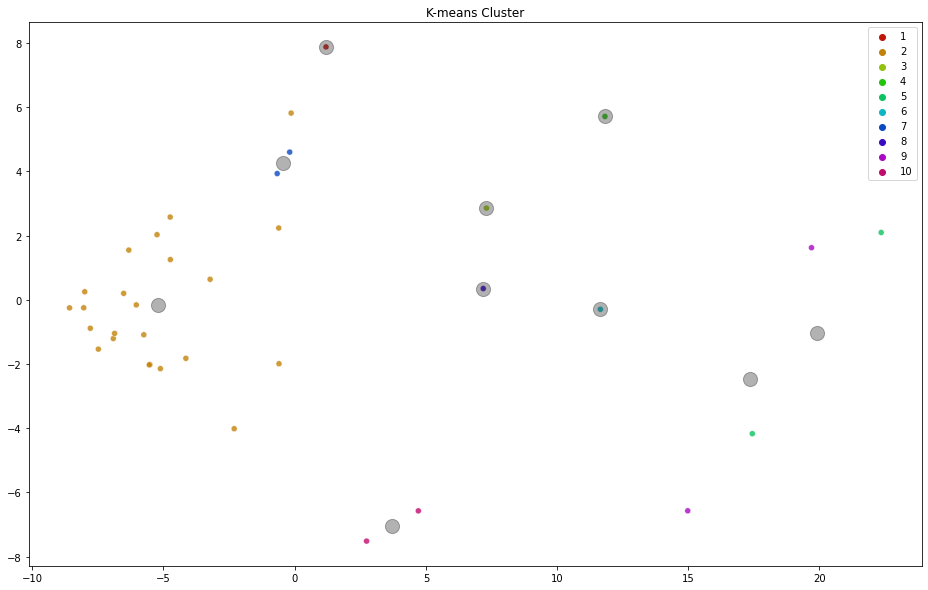

In [167]:
Image(filename = '/Users/max/Documents/MIE 1624/Assignment 3/Work on/K-means Clustering.png', width=700, height=700)

In [162]:
tf_T1.cluster.sort_values()

leadership            1
powerpoint            2
scikit                2
scala                 2
sas                   2
responsibility        2
spss                  2
projectmanagement     2
problemsolving        2
presentation          2
powerbi               2
pandas                2
snowflake             2
matlab                2
javascript            2
java                  2
hadoop                2
excel                 2
efficient             2
datamining            2
critical              2
consulting            2
cloudbased            2
spark                 2
professional          3
communication         4
teamwork              5
python                5
sql                   6
tableau               7
visualization         7
decisionmaking        8
statistics            9
analytics             9
mathematics          10
quantitative         10
Name: cluster, dtype: int32

Due to the reason that Group 2 has many skills which include both many hard skills and soft skills, we need to separate those skills to different courses. And some group only has one or two skills, we need to combine some groups based on the scatterplot distance between each group to design one course.

So, according to the scatterplot we have by K-means clustering, we can decide the curriculum which has 10 courses. The courses and the courrsponding topics are:
1. Business skills for financial professionals, data scientists and other quantitative professionals (how businesses work in a professional way, financial statement analysis, oral and written communications skills)  (Group 1,3,4);
2. Data mining and analysis (csv. data, data mining, Python with libraries for data manipulation and analysis,e.g. pandas,scikit,  presentation for analysis result)  (Group 2);
3. Distributed Computing, Big Data Analytics (distributed computing, Cloud, Hadoop, Spark)  (Group 2);
4. Management and Organization (project management, critical, presentation)  (Group 2);
5. Cloud-based data analysis  (snowflake,cloud data analysis, sas, spss, powerpoint presentation)  (Group 2);
6. Business and Consulting(problem solving skills, consulting, business responsibility)  (Group 2);
7. Computer Science (java, javascript, scala)  (Group 2);
8. Statistical analysis for Business (statistical modeling, python Artificial Intelligence, team project)  (Group 5,9);
9. Data management and Visualization for Business(SQL, noSQL,tableau, data visualization for business, business decision making based on visualization)  (Group 6,7,8);
10. Math and Quant (Calculus, Linear Algebra, Quant with numeric analysis) (Group 10).

## Compare, Present and justify your final course curriculum

For the two course curriculums from Hierarchical clustering and K-means clustering, some courses and their corresponding covered skills are same or almost same except one skill. For example, they both have courses with same or almost same skills:'Data mining and analysis', 'Management and Organization', 'Math and Quant', 'Statistical analysis for Business'. 
For the differences between two course curriculums is that course curriculum formed by K-means clustering has more courses than course curriculum formed Hierarchical clustering. The courses 'Business skills for financial professionals, data scientists and other quantitative professionals' and 'Computer Science' only appears in K-means' curriculum. The reason why curriculum from Hierarchical clustering doesn't have is that the skills leadership, professional, communication are separated into different clusters with large distance when clustering. And is the same for skills java, javascript and scala. So we can't combine these skills together to make a meaningful course. But for K-means, these clusters are close so that we can combine them to design the course.

In addition, although some courses between two course curriculums are similar which covers some same skills, they cover different numbers and combination of skills in different curriculums. For example, the course 'Data Visualization' in Hierarchical clustering curriculum covers skills: using spark to analyze data and then use tableau, power bi to visualization, problem solving combining analyzing and visualization. But in K-means clustering curriculum, the similar course is called 'Data management and Visualization for Business' and covers skills: SQL, noSQL,tableau, data visualization for business, business decision making based on visualization. Again, the reason leads to this is still the clustering, i.e. the different model and algorithm in Hierarchical clustering and K-means clustering.

In summary, the two course curriculums from Hierarchical clustering and K-means clustering are similar and make sense. The courses in both course curriculums all covers useful skills for student to student. They all can let student study not only the Data science, AI, big data, but also the soft skills like the communication, team work, project management and so on.

Eventually, I choose the curriculum from section 3 (Hierarchical clustering). The reason is that:
Firstly, the Hierarchical clustering's cluster result is great. It doesn't have a big cluster that includes many skills like the group 2 (cluster 2) in K-means clustering result. We don't need to separate skills from one big cluster to different courses. Secondly, we can easily and reasonable combine different small groups in Hierarchical clustering to design a course. Thirdly, the Hierarchical clustering result gives a more reasonable and implementable course curriculum. Although the course curriculum of K-means clustering has more courses and some courses covers more skills compared to similar course in course curriculum of Hierarchical clustering, we still need to give more consideration to the amount and difficulty of courses that students can take in real learning(world). For example, in fact, the 'Computer Science' course which covers java, javascript, scala in course curriculum of K-means clustering is not necessary for many students who are only thinking about using python or other not basic computer languages for data processing and future career. Also, it may very hard for some students that change their major to the Data related major, e.g. our “Master of Business and Management in Data Science and Artificial Intelligence” program. So, I choose the curriculum from section 3 (Hierarchical clustering).
